# Segmentation using Chan Vese Notebook

Explanation to do

Definitions:
- `input` we talk about the raw image that must be segmented.
- `output` we talk about the mask image that is the segmentation of the `input`

## Imports

In [22]:
from placozoan.base_segmentation import ChanVese
from placozoan.utils import load_params, load_tiff, save_tiff
from pathlib import Path
from napari import Viewer
import tifffile
import numpy as np
import timeit

## Load Parameters for the segmentation
You need to tune parameters to adapt the segmentor to your image.
Please check the `param_path` where every necessary parameters are stored for YOU to change.

In [23]:
# load params

param_path = Path('../parameters/default_chanvese.yml')
params = load_params(param_path)

In [24]:
params

{'input': {'path': '../data/algae_bis.tif',
  'axes': 'YX',
  'rearrange_pattern': 'None'},
 'output': {'path': '../data/results/algae_masked_chanvese.tif',
  'axes': 'TYX',
  'rearrange_pattern': 'None'},
 'chanvese': {'disk_size': 4, 'iteration_nb': 10}}

## Load Image
For the demo, only the 10 first image are taken

In [25]:
# load image

im_path = Path(params["input"]["path"])
im_axes = params["input"]["axes"]
im = load_tiff(im_path, im_axes) # take only a slice of the image for demo

In [29]:
i = np.expand_dims(im,axis=0)
print(np.shape(i))

i = i/255

(1, 576, 576)


In [30]:
print(np.max(i))

1.0


im_path = Path(params["input"]["path"])
im_axes = params["input"]["axes"]
im = tifffile.imread(im_path)
print(np.shape(im))
#im = im[:,:,:,0]

## Run the Segmentation

In [31]:

segmentator_params = params["chanvese"]
segmentator = ChanVese(i, params=segmentator_params)
mask = segmentator.get_segmentation()


## Save the Segmentation result

In [32]:
output_path = Path(params["output"]["path"])
output_axes = params["output"]["axes"]
save_tiff(output_path, mask, output_axes)

WindowsPath('../data/results/algae_masked_chanvese.tif')

The mask is saved at `output_path`. You can open it with your favorite image viewer (Napari, ImageJ, Imaris, ...)
The following section propose you pythonic way to visualize the input and output images

# Matplotlib Viewer

In [10]:
import matplotlib.pyplot as plt

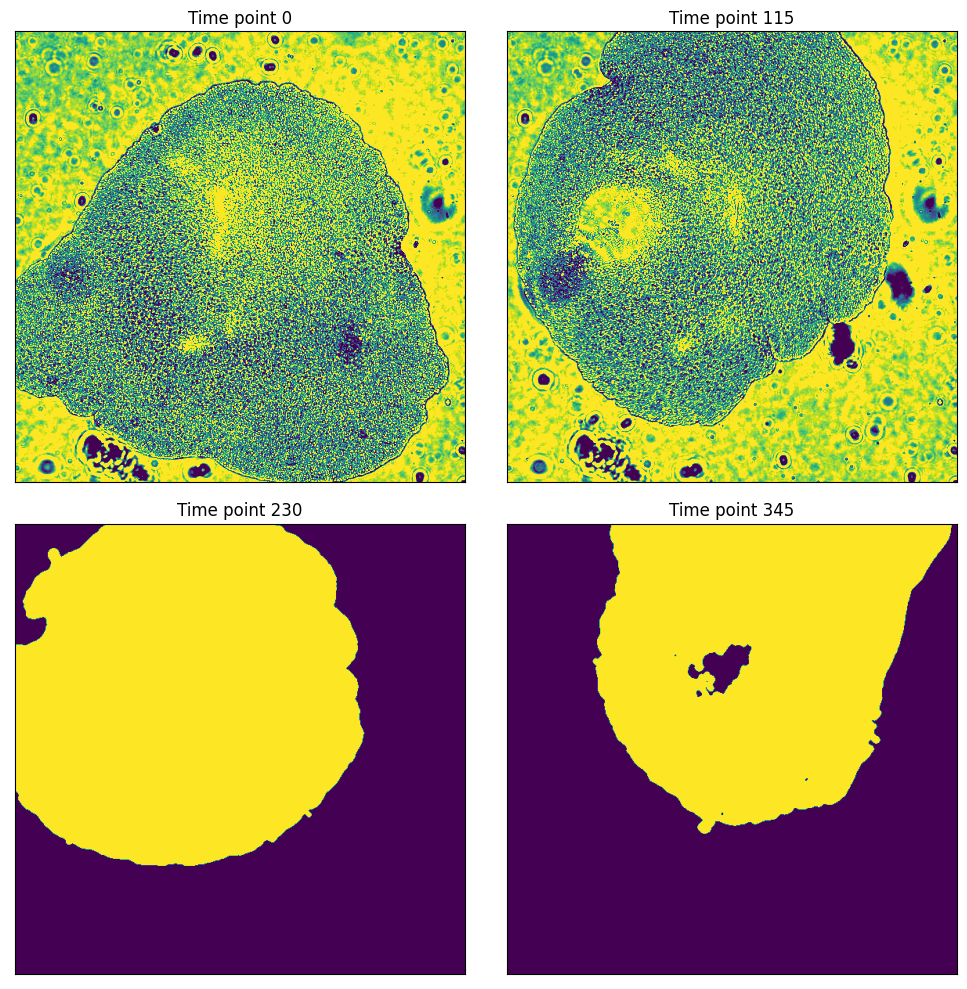

In [11]:
nb_time_points = len(im)

fig, axes = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'aspect':1}, sharex=True, sharey=True)
axes = axes.flatten()
for i, ax in enumerate(axes):
    tp = i*(nb_time_points-1)//(len(axes)-1)
    if i // 2 == 0:
        ax.imshow(im[tp, ...], vmin=10, vmax=100)
    else:
        ax.imshow(mask[tp, ...])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Time point {tp}')
fig.tight_layout()

# Napari Viewer

In [33]:
viewer = Viewer()

In [34]:
im_layer = viewer.add_image(im)
mask_layer = viewer.add_labels(mask)

In [19]:
# if you want to save the manually corrected mask run this cell
mask_corrected = mask_layer.data
output_path = Path(params["output"]["path"])
output_axes = params["output"]["axes"]
save_tiff(output_path, mask, output_axes)

WindowsPath('../data/results/placozoan-movie_masked.tif')